# Вебинар 3. Визуализация и анализ данных.

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('seaborn-ticks')
#plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (6, 4)
matplotlib.rcParams.update({'font.size': 14})

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

**Пути к директориям и файлам**

In [3]:
PREPARED_DATASET_PATH = '../data/housing_prepared.csv'
CALIFORNIA_MAP_PATH = 'California_Map.png'

### Загрузка данных

**Описание датасета**

Статистические данные о группах домов в Калифорнии, основанные на переписи 1990 года.   

A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

* **longitude** - долгота группы
* **latitude** - широта группы
* **housing_median_age** - средний возраст дома в группе (Median age of a house within a block)
* **total_rooms** - общее количество комнат в группе домов (Total number of rooms within a block)
* **total_bedrooms** - общее количество спален в группе домов (Total number of bedrooms within a block)
* **population** - количество проживающих в группе домов (Total number of people residing within a block)
* **households** - количество общин (Total number of households, a group of people residing within a home unit, for a block)
* **ocean_proximity** - близость океана
* **median_income** - средний доход общины (Median income for households within a block of houses, measured in tens of thousands of US Dollars)
* **median_house_value** - средняя стоимость дома (Median house value for households within a block, measured in US Dollars)

In [5]:
df = pd.read_csv(PREPARED_DATASET_PATH)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   <1H OCEAN  INLAND  NEAR BAY  NEAR OCEAN  rooms_per_household  \
0          0       0         1           0             6.984127   
1          0       0         1           0             6.238137   
2          0       0         1           0             8.288136   
3          0       0         1           0             5.817352   
4          0       0         1           0             6.281853   

   bedrooms_per_household  persons_per_household  income_per_person  
0                1.023810               2.555556         258.546584  
1                0.971880               2.109842          34.574761  
2                1.073446               2.802260         146.318548  
3                1.073059               2.547945         101.130824  
4                1.081081               2.181467          68.074336

In [6]:
df.shape

(20635, 18)

### Анализ целевой переменной

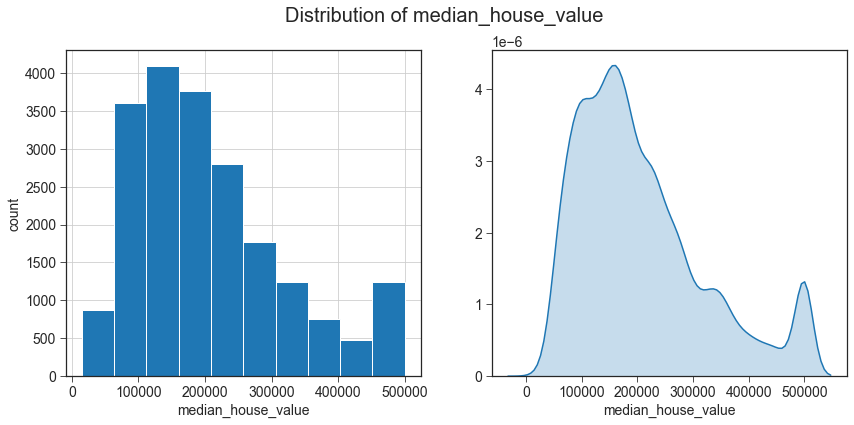

In [7]:
plt.figure(figsize = (14, 6))
# строим гистограмму
plt.subplot(121)
df['median_house_value'].hist(edgecolor='white')
plt.ylabel('count')
plt.xlabel('median_house_value')
# строим график плотности распределения
plt.subplot(122)
sns.kdeplot(df['median_house_value'], shade=True, legend=False)
plt.xlabel('median_house_value')

plt.suptitle('Distribution of median_house_value', size=20);

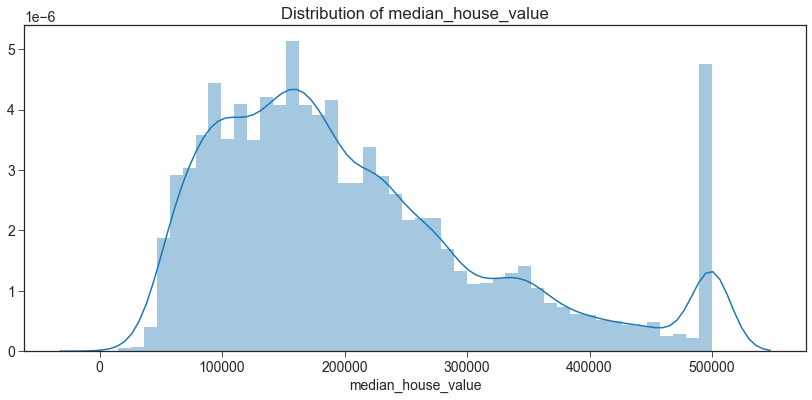

In [8]:
plt.figure(figsize = (14, 6))

sns.distplot(df['median_house_value'])
plt.title('Distribution of median_house_value');

In [9]:
target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

target_mean, target_median, target_mode

(206852.26, 179700.0, 500001.0)

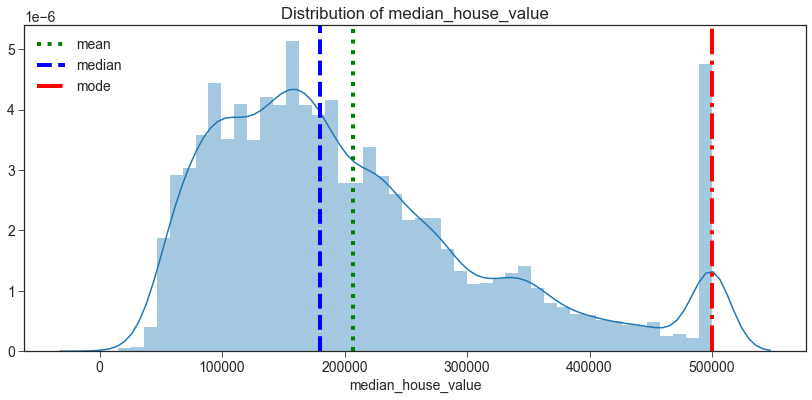

In [21]:
plt.figure(figsize = (14, 6))
sns.distplot(df['median_house_value'])
plt.title('Distribution of median_house_value')
plt.axvline(target_mean, color='g', label='mean', linestyle=':', linewidth=4)
plt.axvline(target_median, color='b', label='median', linestyle='--', linewidth=4)
plt.axvline(target_mode, color='r', label='mode', linestyle='-.', linewidth=4)
plt.legend();

https://plotly.com/python/plotly-express/ - лёгкий и быстрый в использовании модуль для создания интерактивной визуализации

In [26]:
import plotly.express as px

px.histogram(df, x='median_house_value')

### Оценка распредения целевой переменной в разрезе других признаков

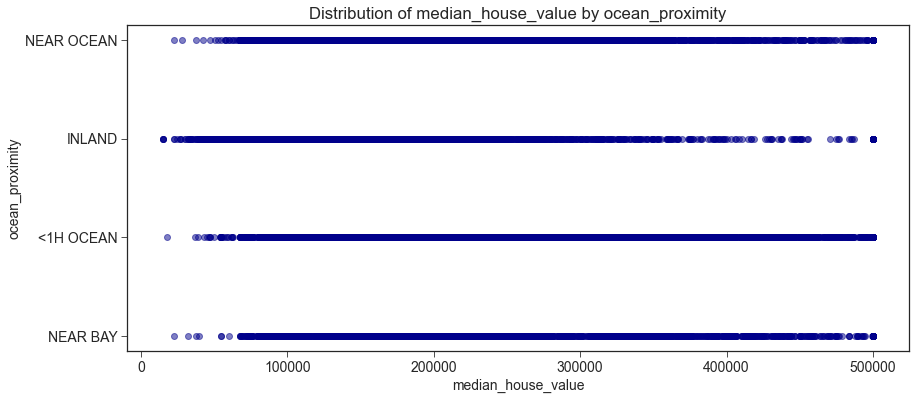

In [27]:
plt.figure(figsize=(14, 6))

plt.scatter(df['median_house_value'], df['ocean_proximity'], alpha=0.5, color='darkblue')

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity');

**Box plot**

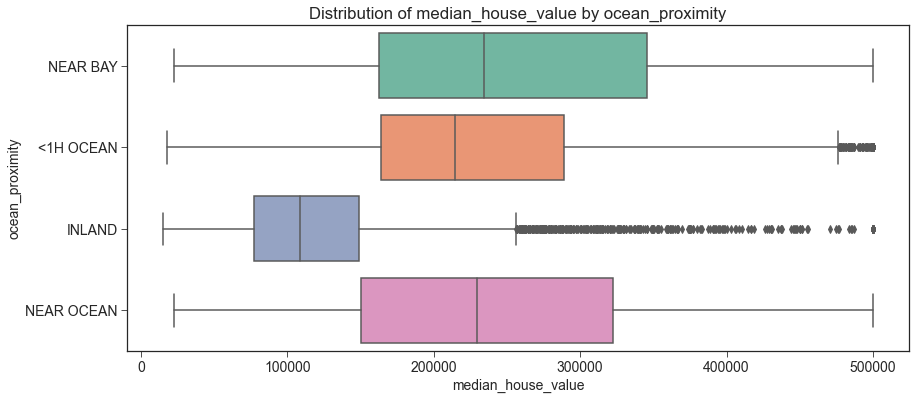

In [28]:
plt.figure(figsize=(14, 6))

sns.boxplot(df['median_house_value'], df['ocean_proximity'], palette='Set2')

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity');

![](boxplot_1.png)

### Анализ признаков

**Количественные признаки**

In [29]:
feature_num_names = df.drop('median_house_value', axis=1).select_dtypes(include='float64').columns.tolist()
feature_num_names

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_household',
 'persons_per_household',
 'income_per_person']

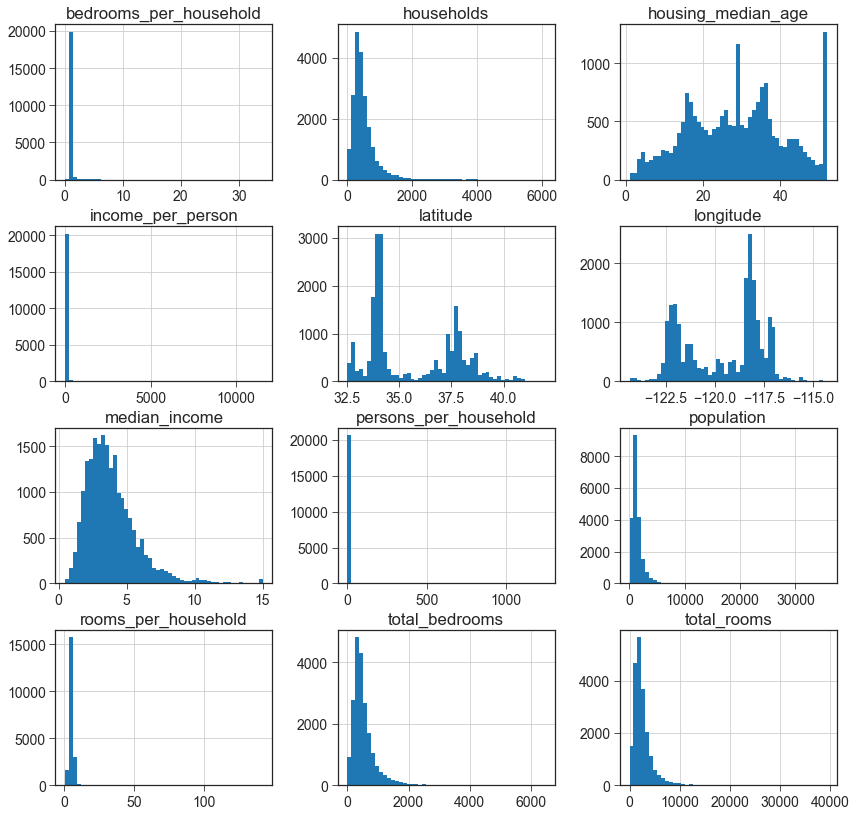

In [30]:
df[feature_num_names].hist(figsize=(14,14), bins=50, grid=True);

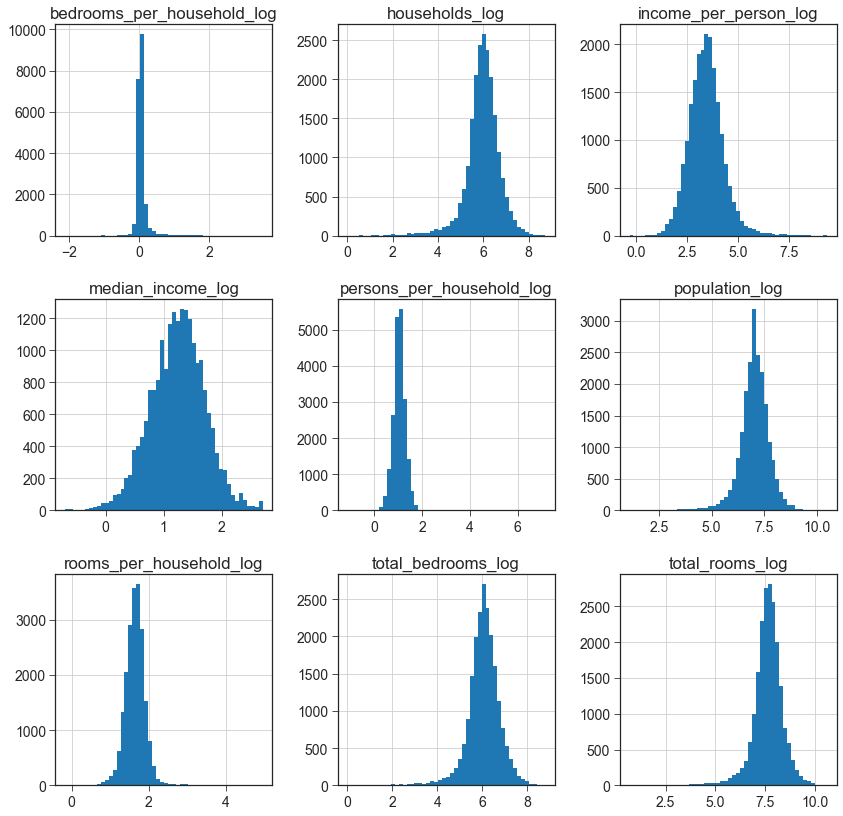

In [32]:
feature_skewed_names = ['households','median_income','population', 'total_bedrooms', 
                        'total_rooms', 'rooms_per_household', 'bedrooms_per_household', 
                        'persons_per_household', 'income_per_person']
feature_log_names = []
for f in feature_skewed_names:
    df[f + '_log'] = np.log(df[f])
    feature_log_names.append(f + '_log')
    
df[feature_log_names].hist(figsize=(14,14), bins=50, grid=True);

**Взаимосвязи между количественными признаками**

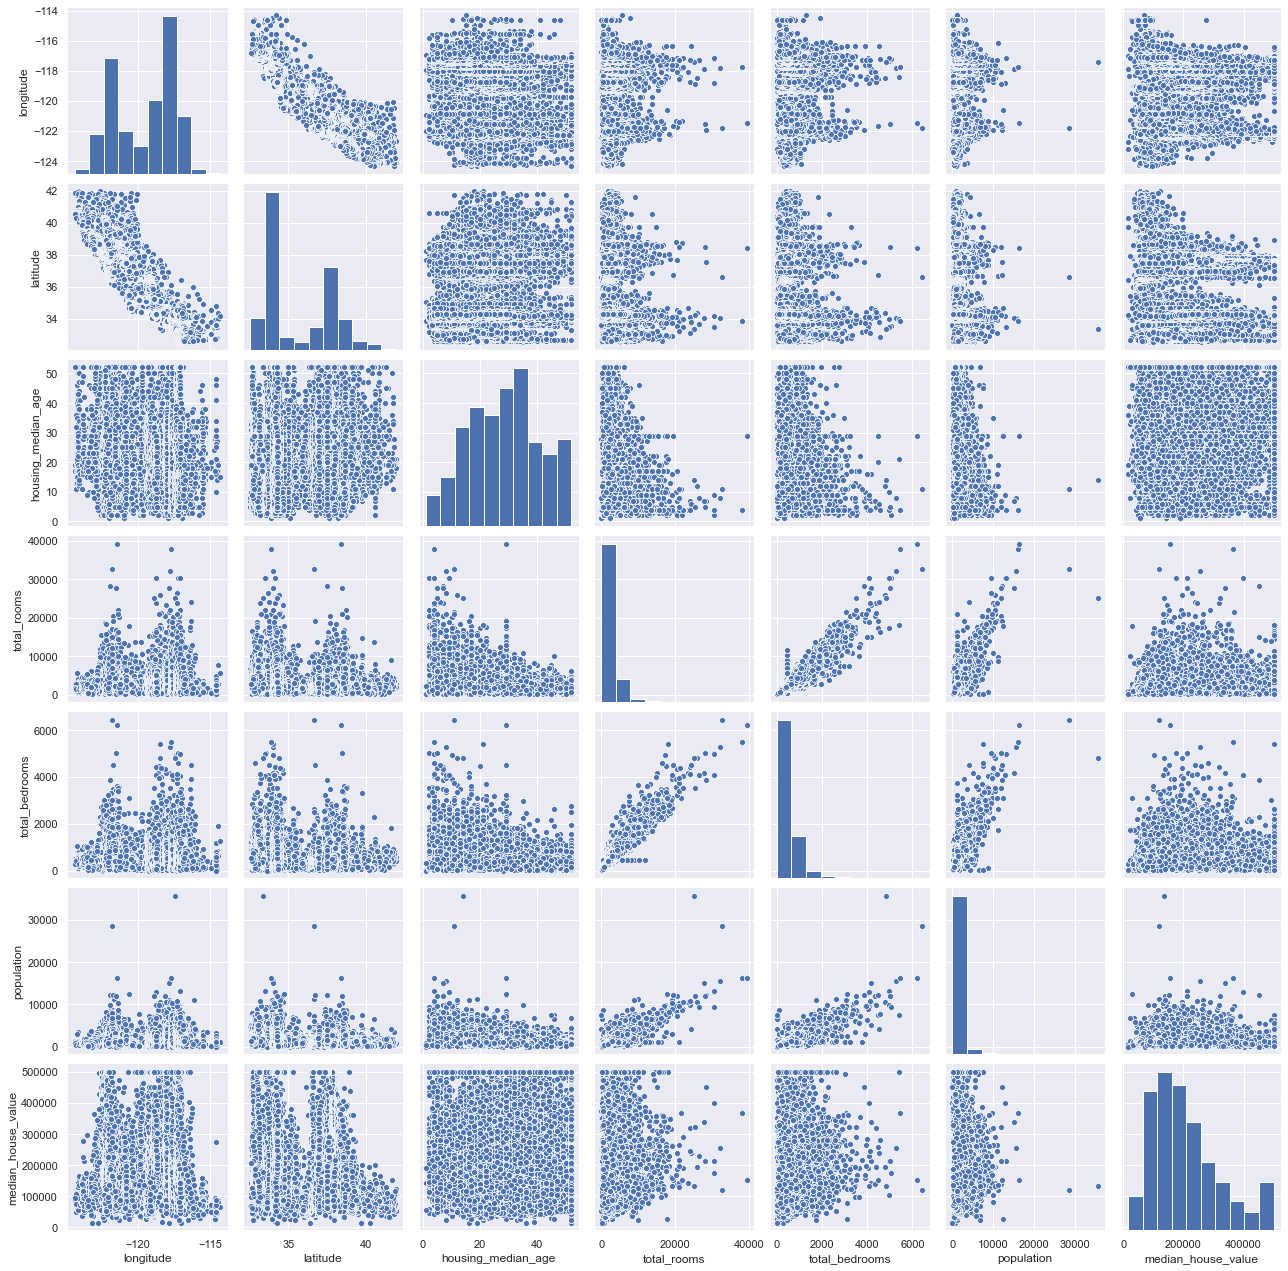

In [33]:
sns.set()
sns.pairplot(df[feature_num_names[:6] + ['median_house_value']]);

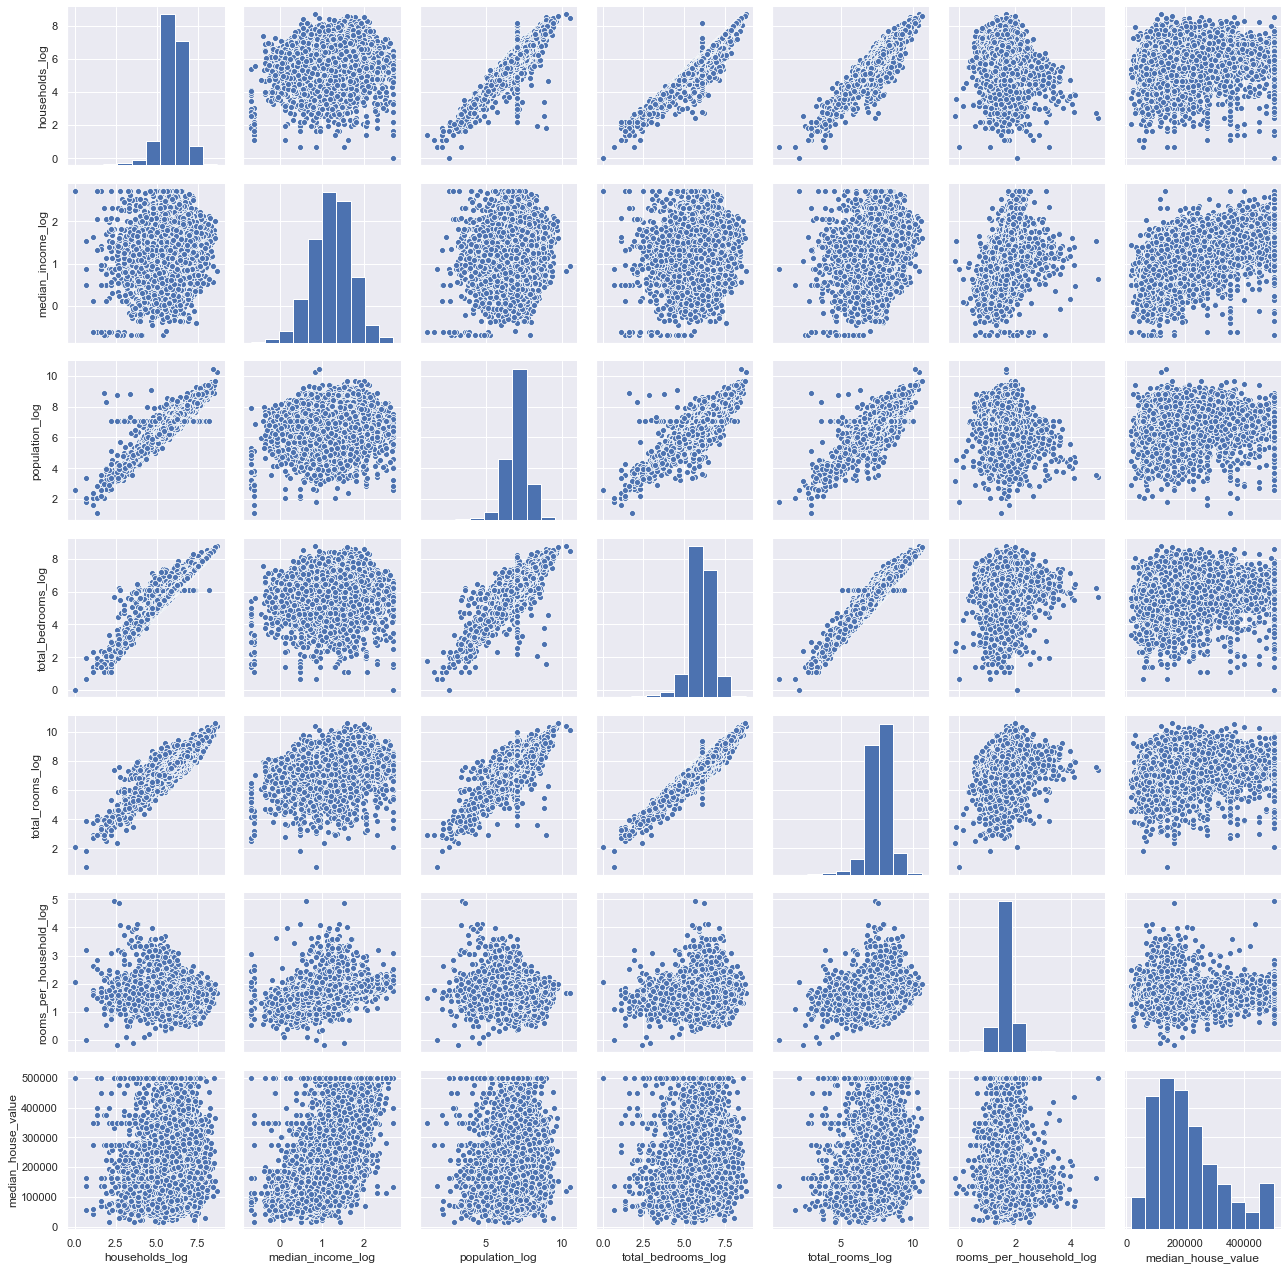

In [34]:
sns.set()
sns.pairplot(df[feature_log_names[:6] + ['median_house_value']]);

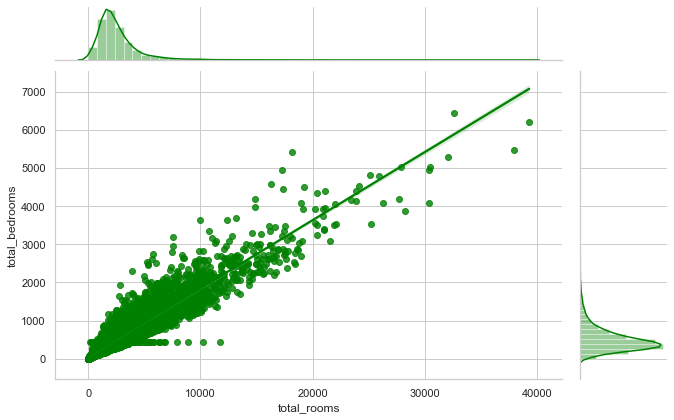

In [35]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df['total_rooms'], df['total_bedrooms'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

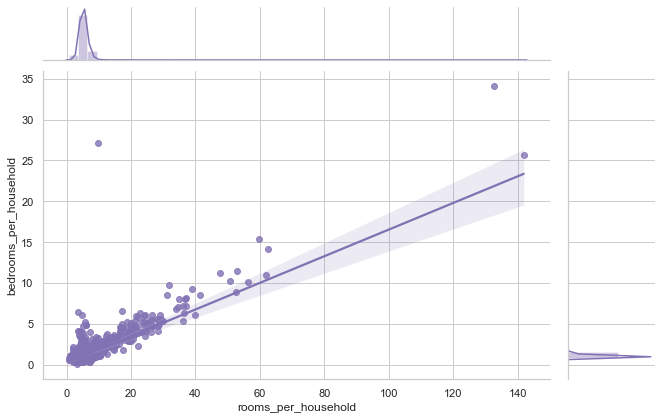

In [36]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df['rooms_per_household'], df['bedrooms_per_household'], 
                         kind='reg', color='m')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

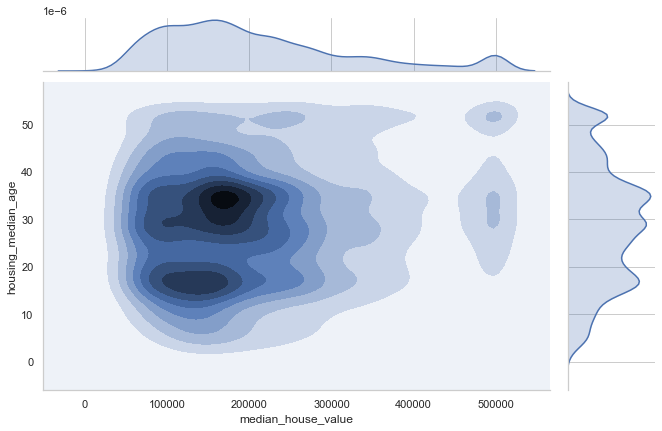

In [37]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df['median_house_value'], df['housing_median_age'], kind='kde')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)

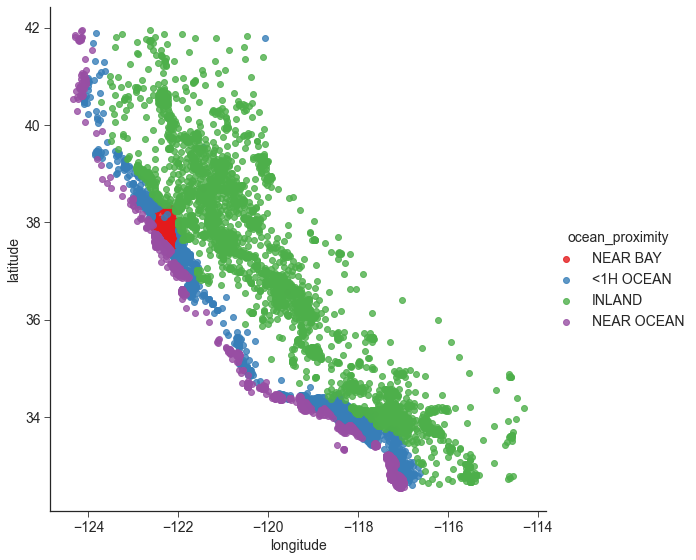

In [7]:
sns.lmplot('longitude', 'latitude', data=df, 
           markers='o', hue='ocean_proximity', 
           fit_reg=False, height=8, palette='Set1');

**Бинарные признаки**

In [39]:
feature_bin_names = df.select_dtypes(include='int64').columns.tolist()
feature_bin_names

['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN']

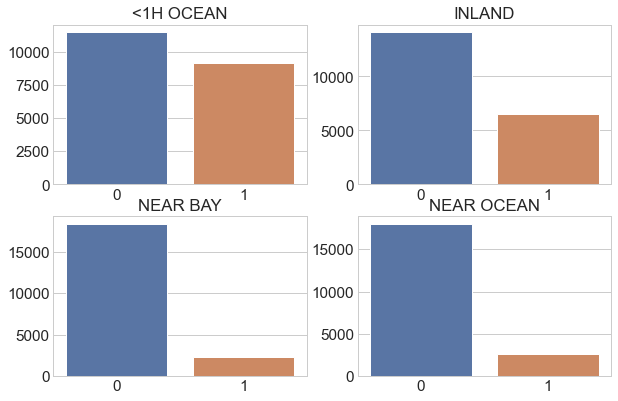

In [40]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,10))
plt.style.use('seaborn-whitegrid')

for i, colname in enumerate(feature_bin_names):
    counts = df[colname].value_counts()
    
    plt.subplot(3,2,i+1)    
    plt.title(colname)
    sns.barplot(counts.index, counts.values)

### Матрица корреляций

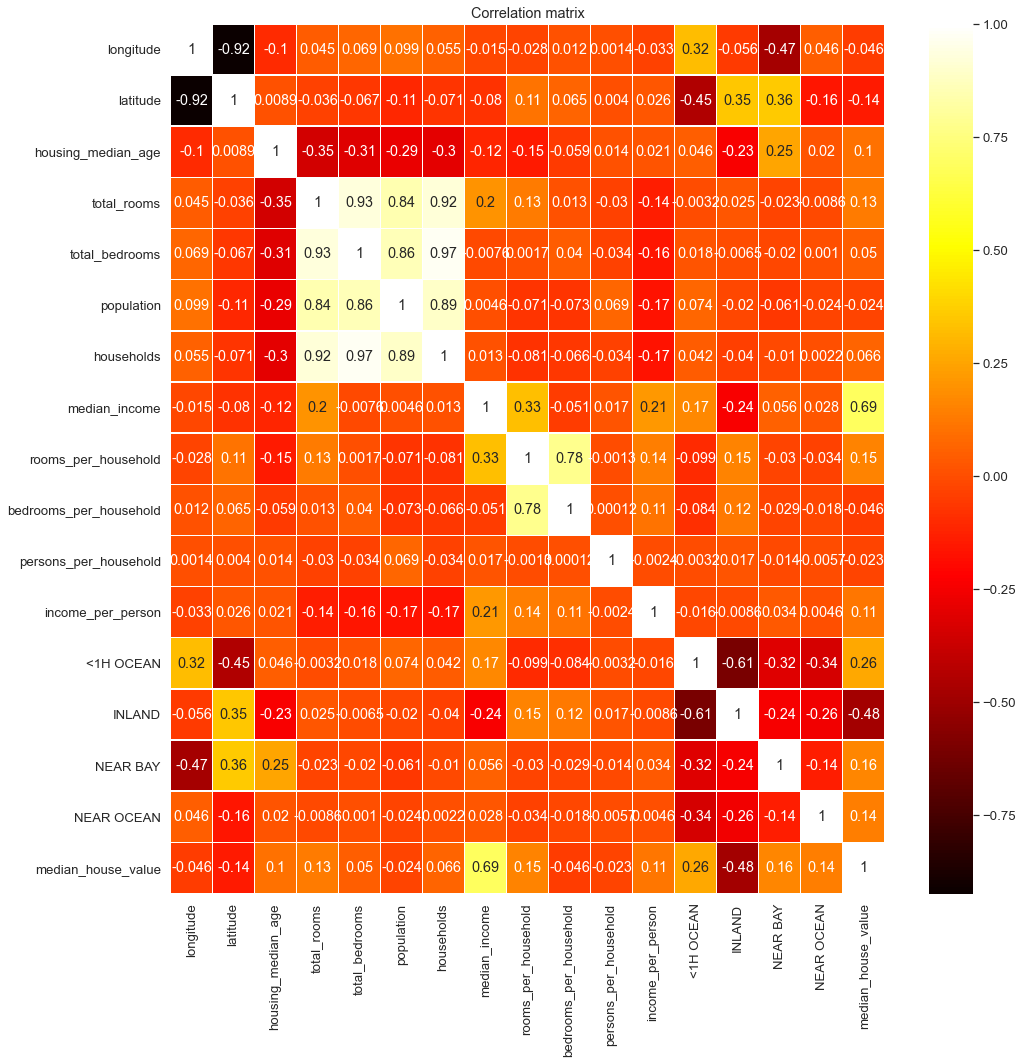

In [41]:
plt.figure(figsize = (16,16))

sns.set(font_scale=1.2)
sns.heatmap(df[feature_num_names + feature_bin_names + ['median_house_value']].corr(), 
            annot=True, linewidths=.5, cmap='hot')

plt.title('Correlation matrix');

### Визуализация данных на карте

In [9]:
california_map = img.imread(CALIFORNIA_MAP_PATH)

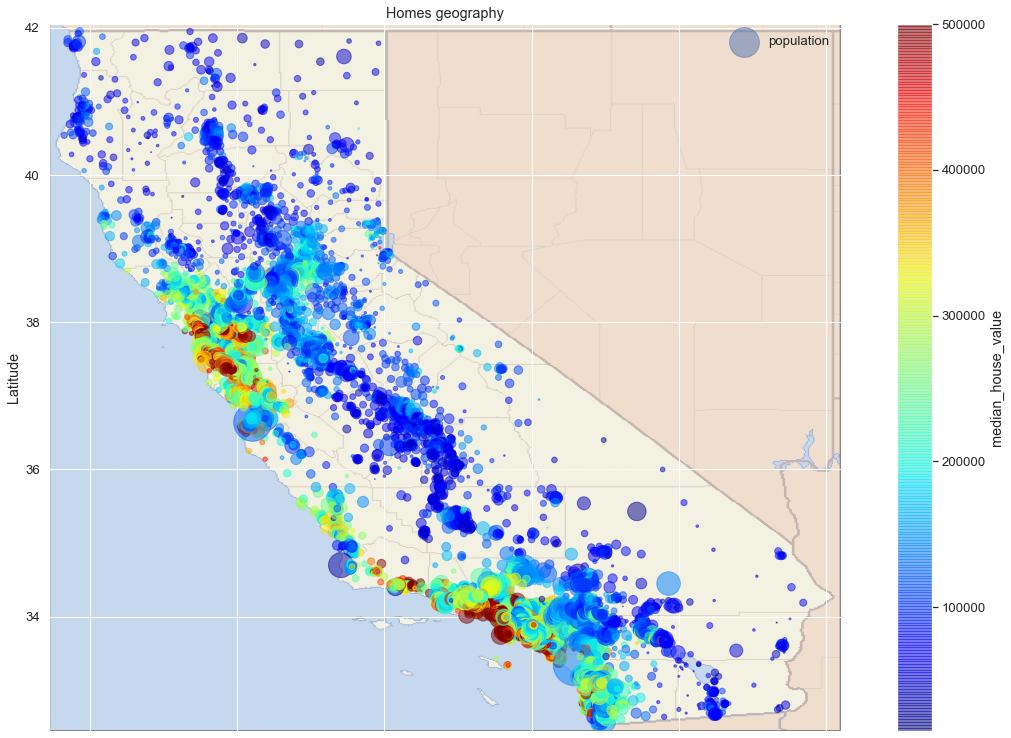

In [43]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
        s=df['population'] / 20, label='population', c='median_house_value', 
        cmap=plt.get_cmap('jet'), figsize=(20,13))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography")
plt.legend();

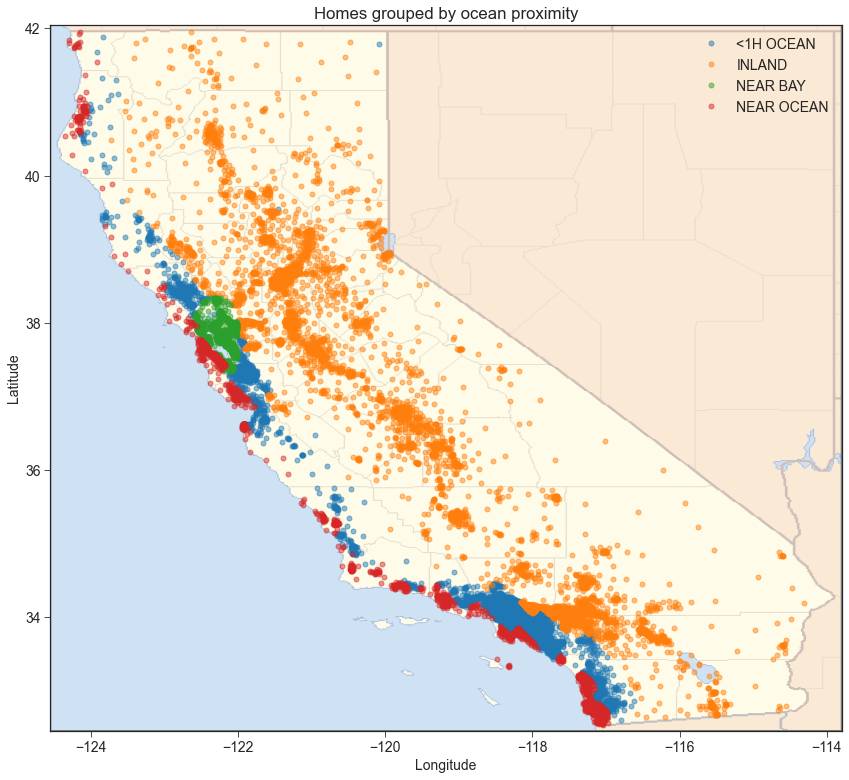

In [10]:
groups = df.groupby('ocean_proximity')

fig, ax = plt.subplots(figsize=(20, 13))
for name, group in groups:
    ax.plot(group['longitude'], group['latitude'], marker='o', linestyle='', ms=5, 
            label=name, alpha=0.5)
    
plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Homes grouped by ocean proximity")
ax.legend(loc='upper right');